In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from wordcloud import WordCloud

In [2]:
GOT = pd.read_csv('./Game_of_Thrones_Script.csv')
GOT.head(5)

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.


## Data preprocessing

In [4]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23911 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23911 non-null  object
 1   Season         23911 non-null  object
 2   Episode        23911 non-null  object
 3   Episode Title  23911 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23911 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [7]:
GOT = GOT.dropna()
GOT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Release Date   23908 non-null  object
 1   Season         23908 non-null  object
 2   Episode        23908 non-null  object
 3   Episode Title  23908 non-null  object
 4   Name           23908 non-null  object
 5   Sentence       23908 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB


In [8]:
GOT['Release Date'] = pd.to_datetime(GOT['Release Date'])

In [9]:
GOT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23908 entries, 0 to 23910
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Release Date   23908 non-null  datetime64[ns]
 1   Season         23908 non-null  object        
 2   Episode        23908 non-null  object        
 3   Episode Title  23908 non-null  object        
 4   Name           23908 non-null  object        
 5   Sentence       23908 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.3+ MB


In [12]:
GOT['year'] = GOT['Release Date'].dt.year
GOT['month'] = GOT['Release Date'].dt.month
GOT.head(5)

,Release Date,Season,Episode,Episode Title,Name,Sentence,year,month
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...,2011,4
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...,2011,4
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?,2011,4
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.,2011,4
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.,2011,4


## EDA

In [33]:
occurrences = GOT.Name.value_counts().head(30)
occurrences = occurrences.sort_values(ascending=True)

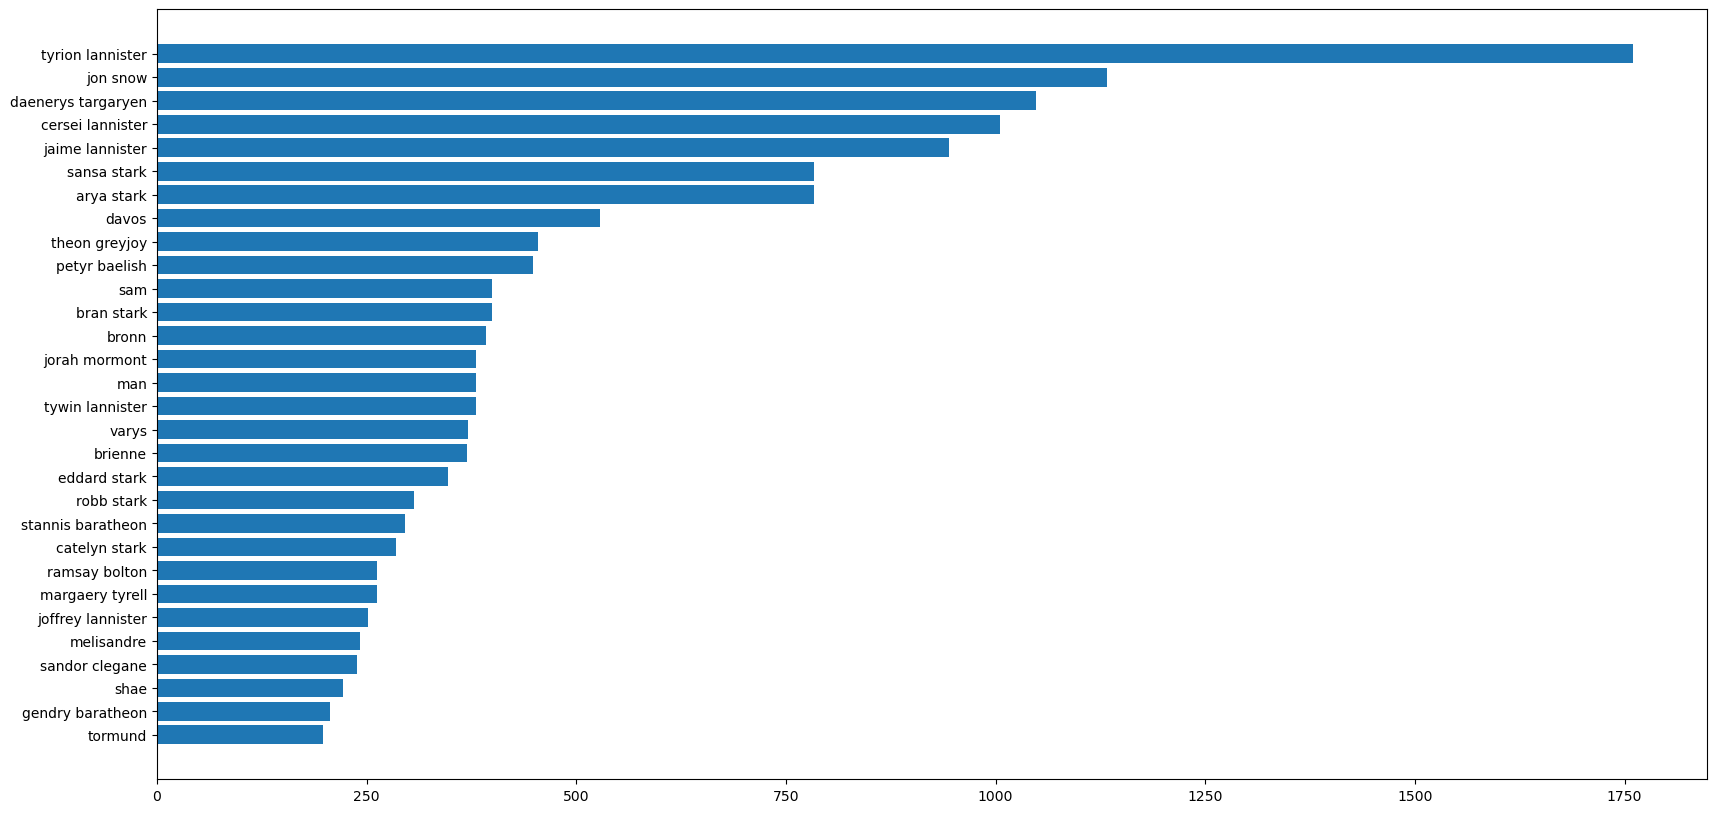

In [35]:
plt.figure(figsize=(20,10))
plt.barh(occurrences.index,occurrences);

**This graph allows us to see the 30 characters most present throughout the series**

**We can see that in the series, Tyrion Lannister is the character who has the highest number of lines.**


## We are going to examine the dataset based on seasons
Now, we are going to look at the significance of characters by season

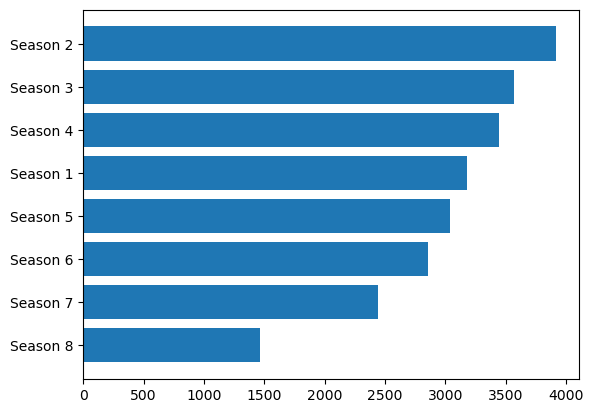

In [44]:
Seasons = GOT['Season'].value_counts()
Seasons = Seasons.sort_values(ascending=True)
plt.barh(Seasons.index,Seasons)
plt.show();

**We can see that Season 2 has the highest number of lines and the Season 8 is the one with the least**

In [62]:
def importance_of_character_per_Season(df):
    for season in Seasons.index:
        Season = df[df['Season']==season]
#         print(f"{season}".center(80,"#"))
#         print(Season.shape)
        occurrences = Season.Name.value_counts().head(30)
        occurrences = occurrences.sort_values(ascending=True)
        plt.figure(figsize=(25,10))
        plt.barh(occurrences.index,occurrences)
        plt.title(season)
        plt.show()
        

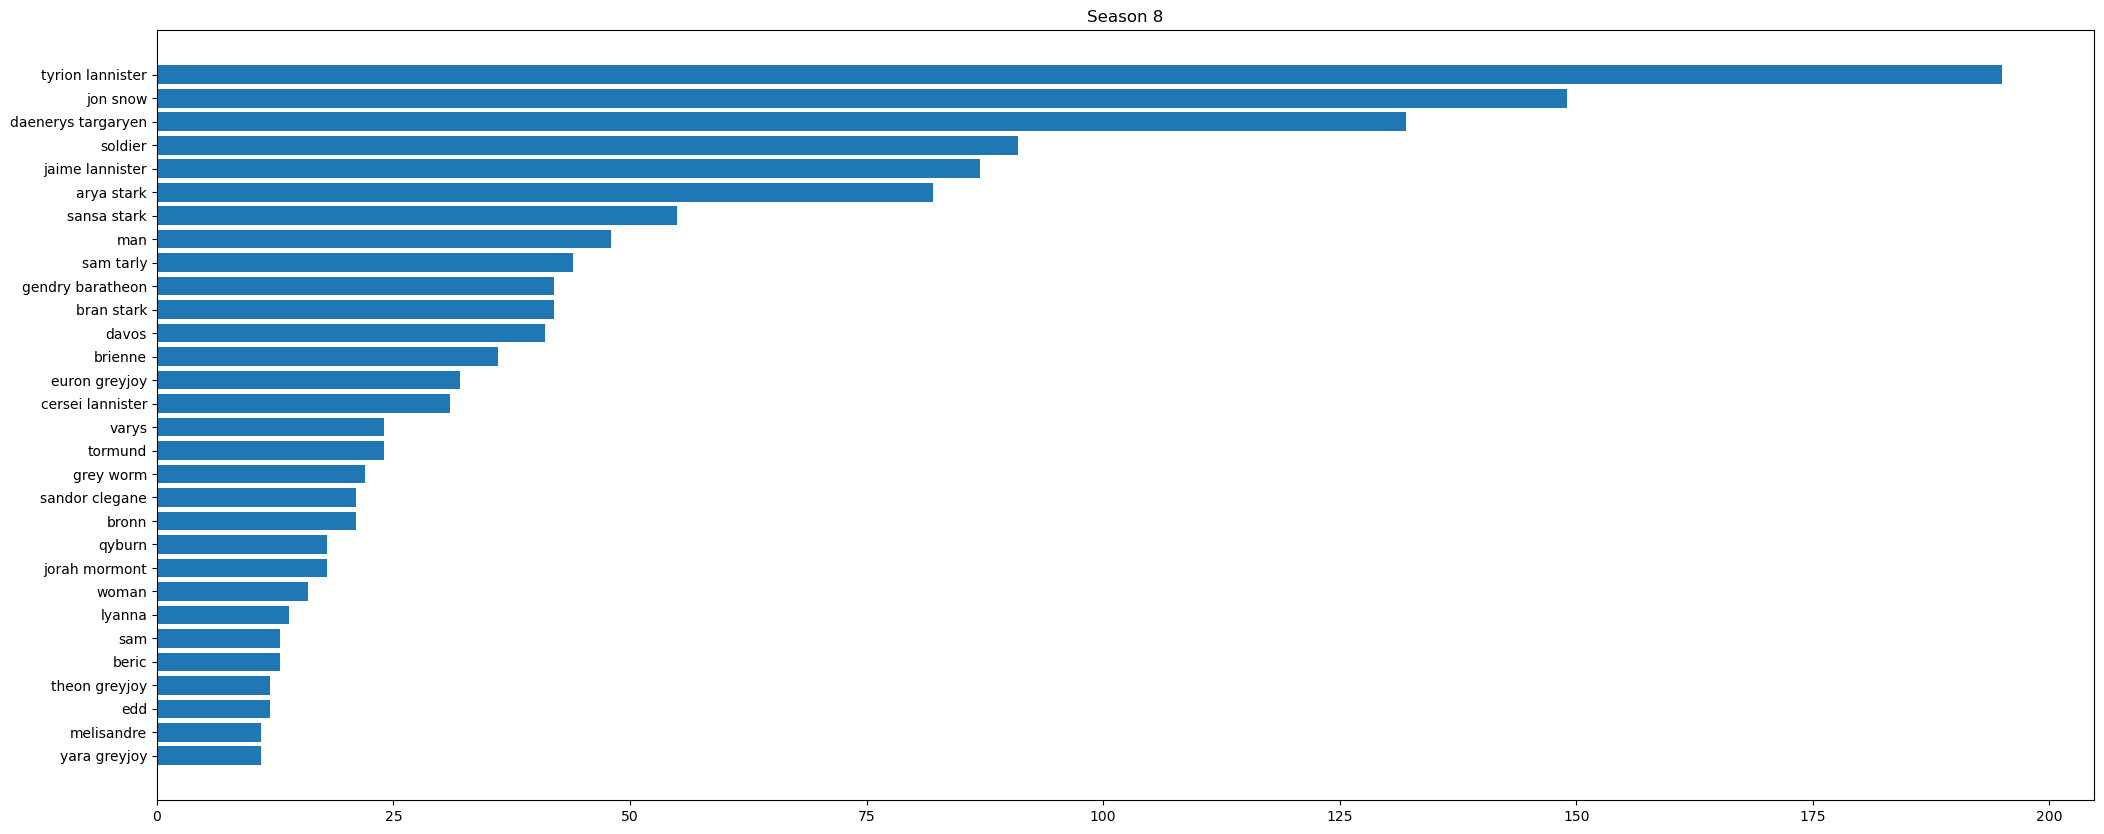

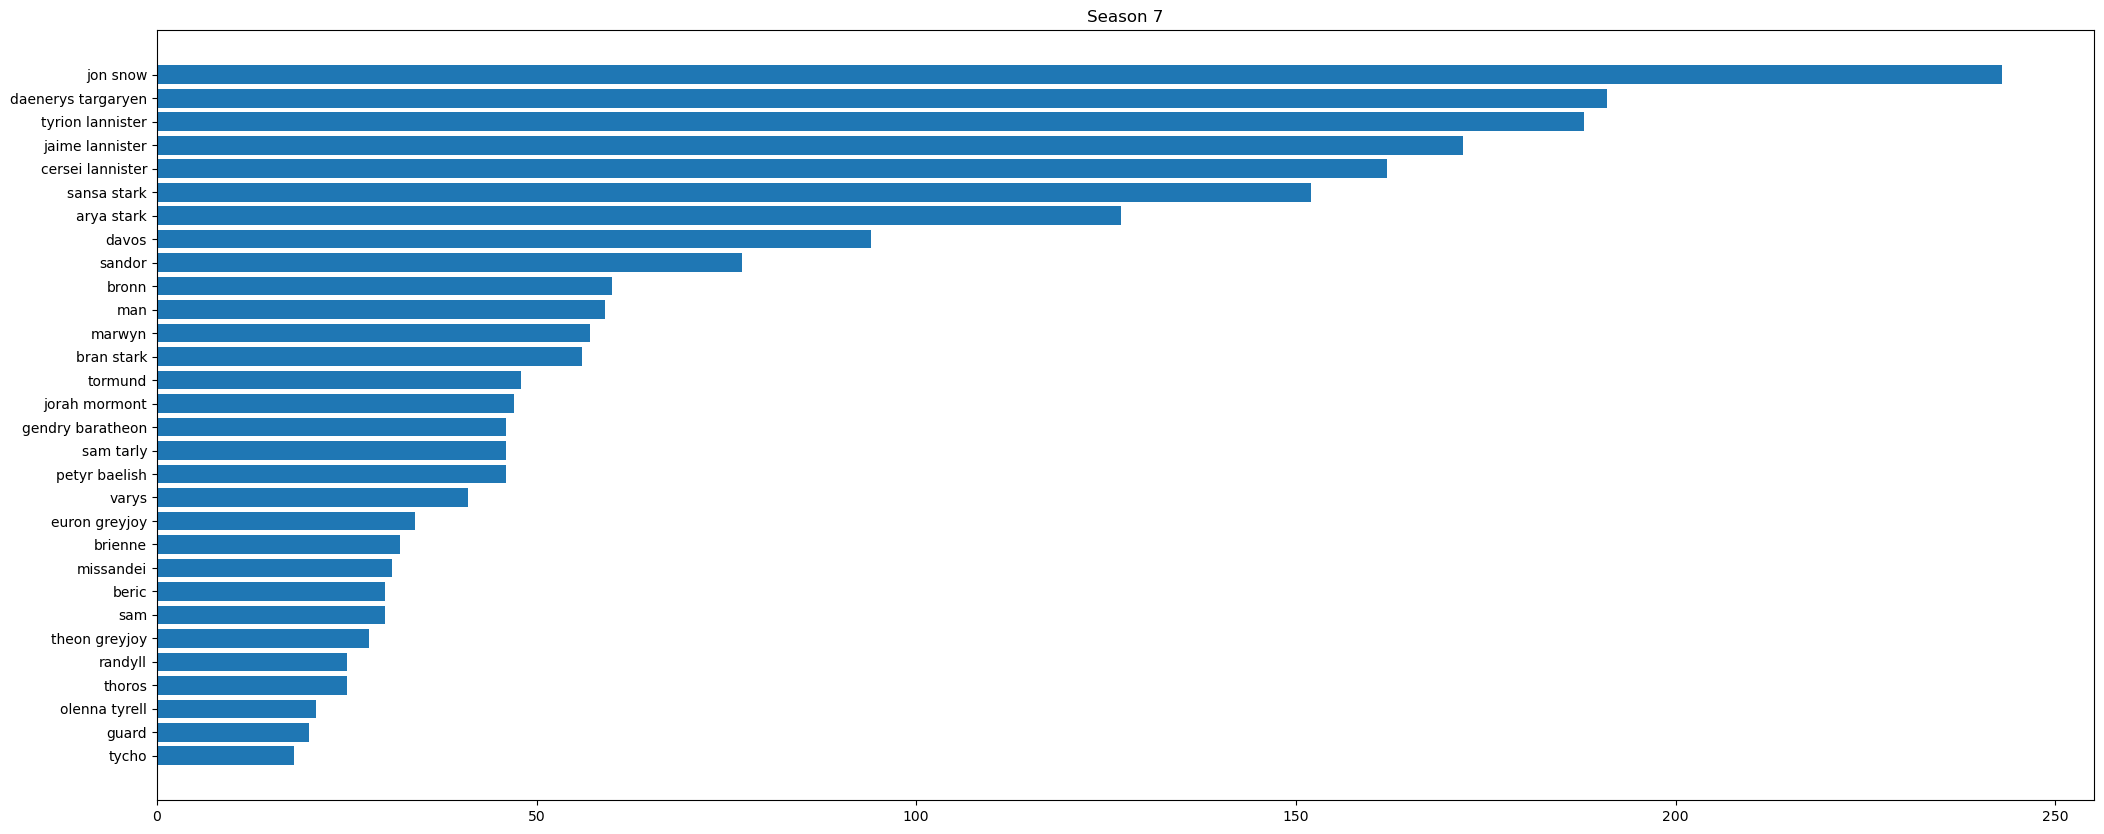

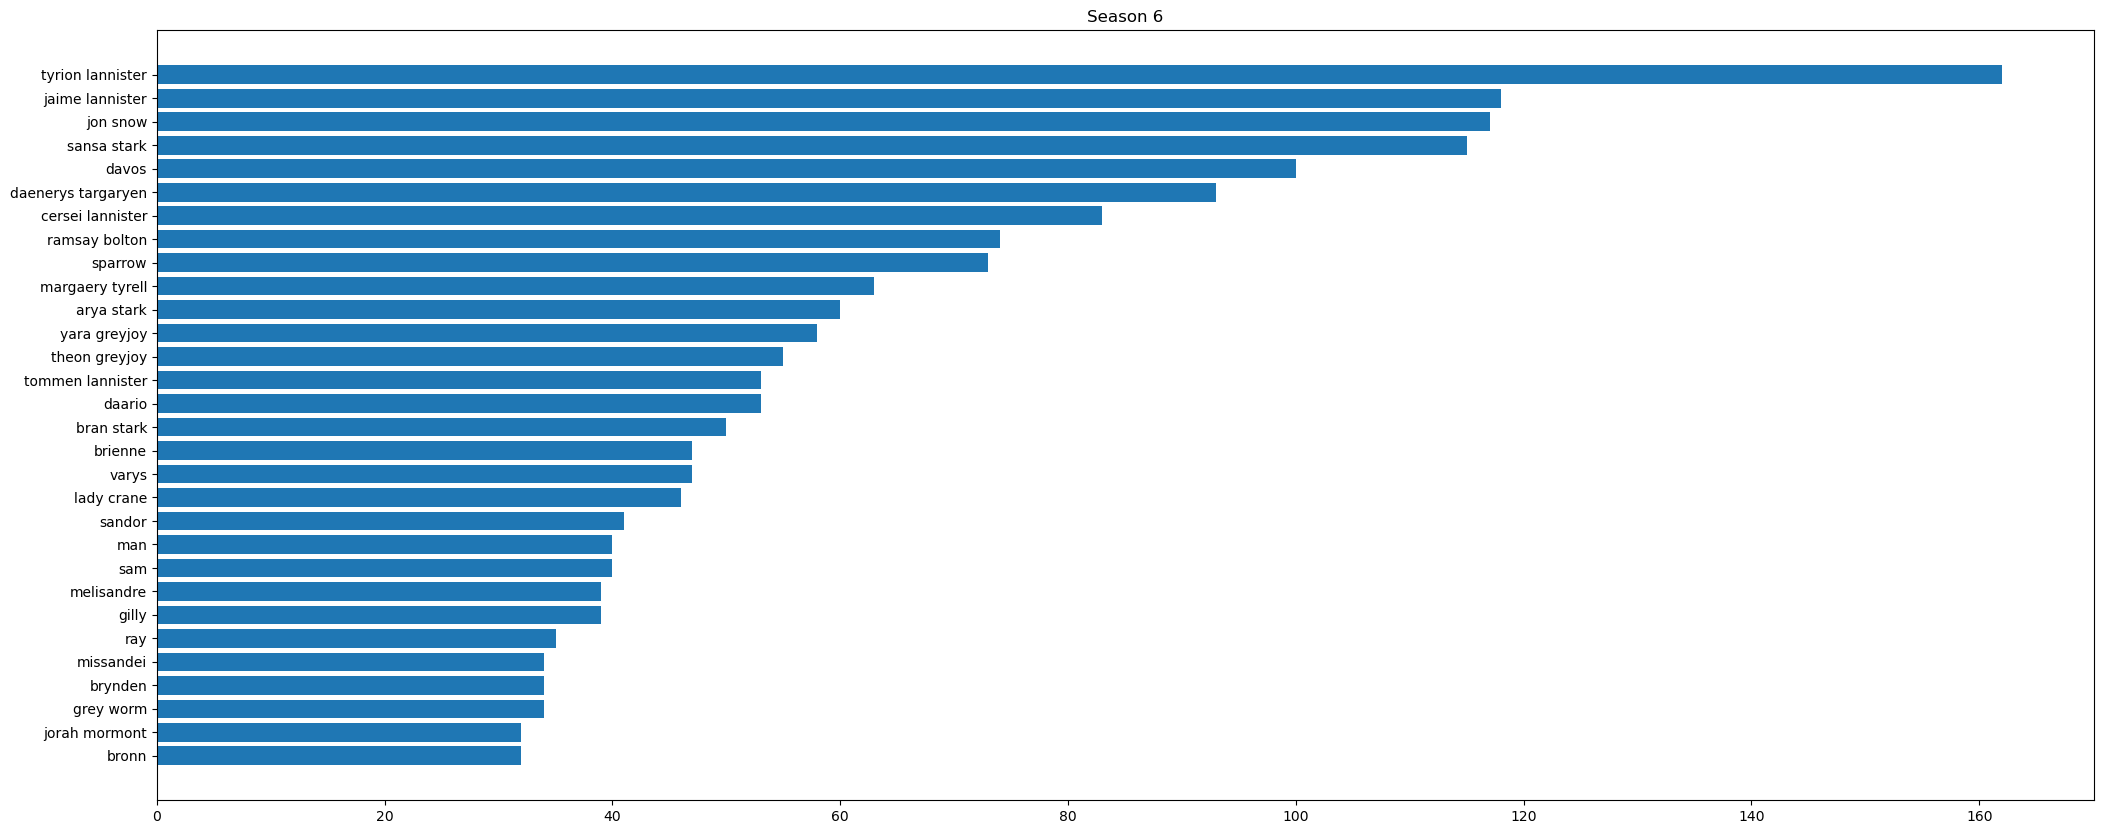

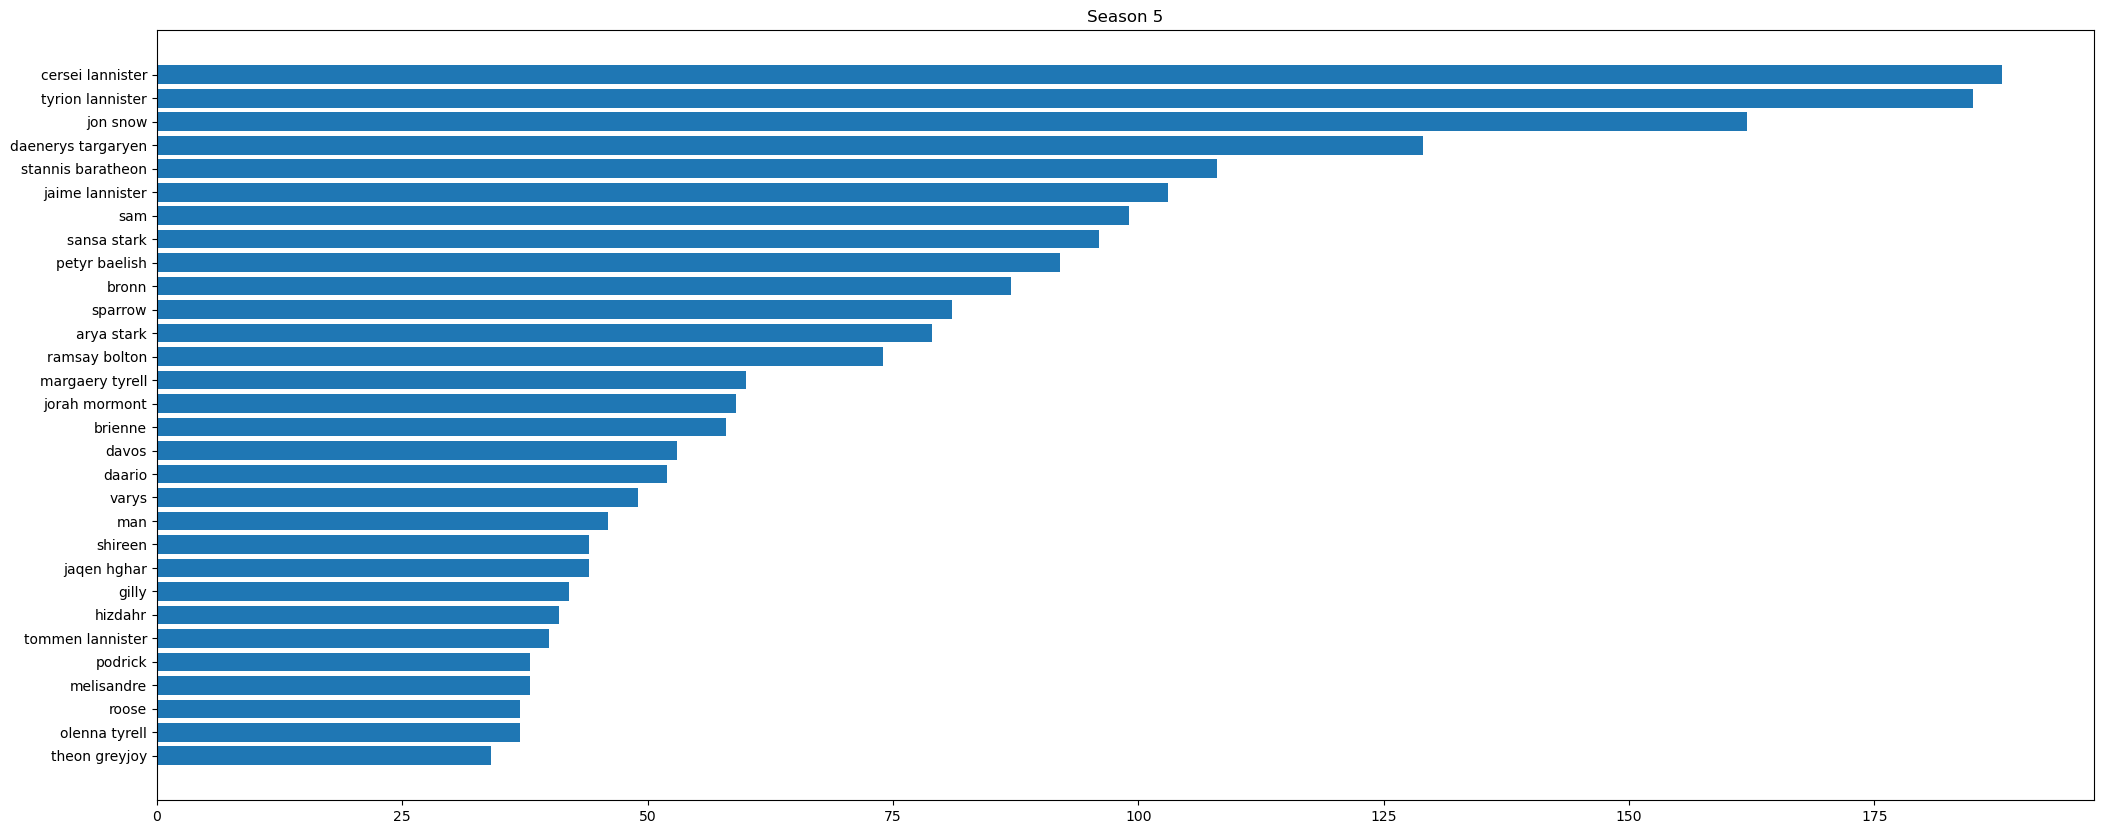

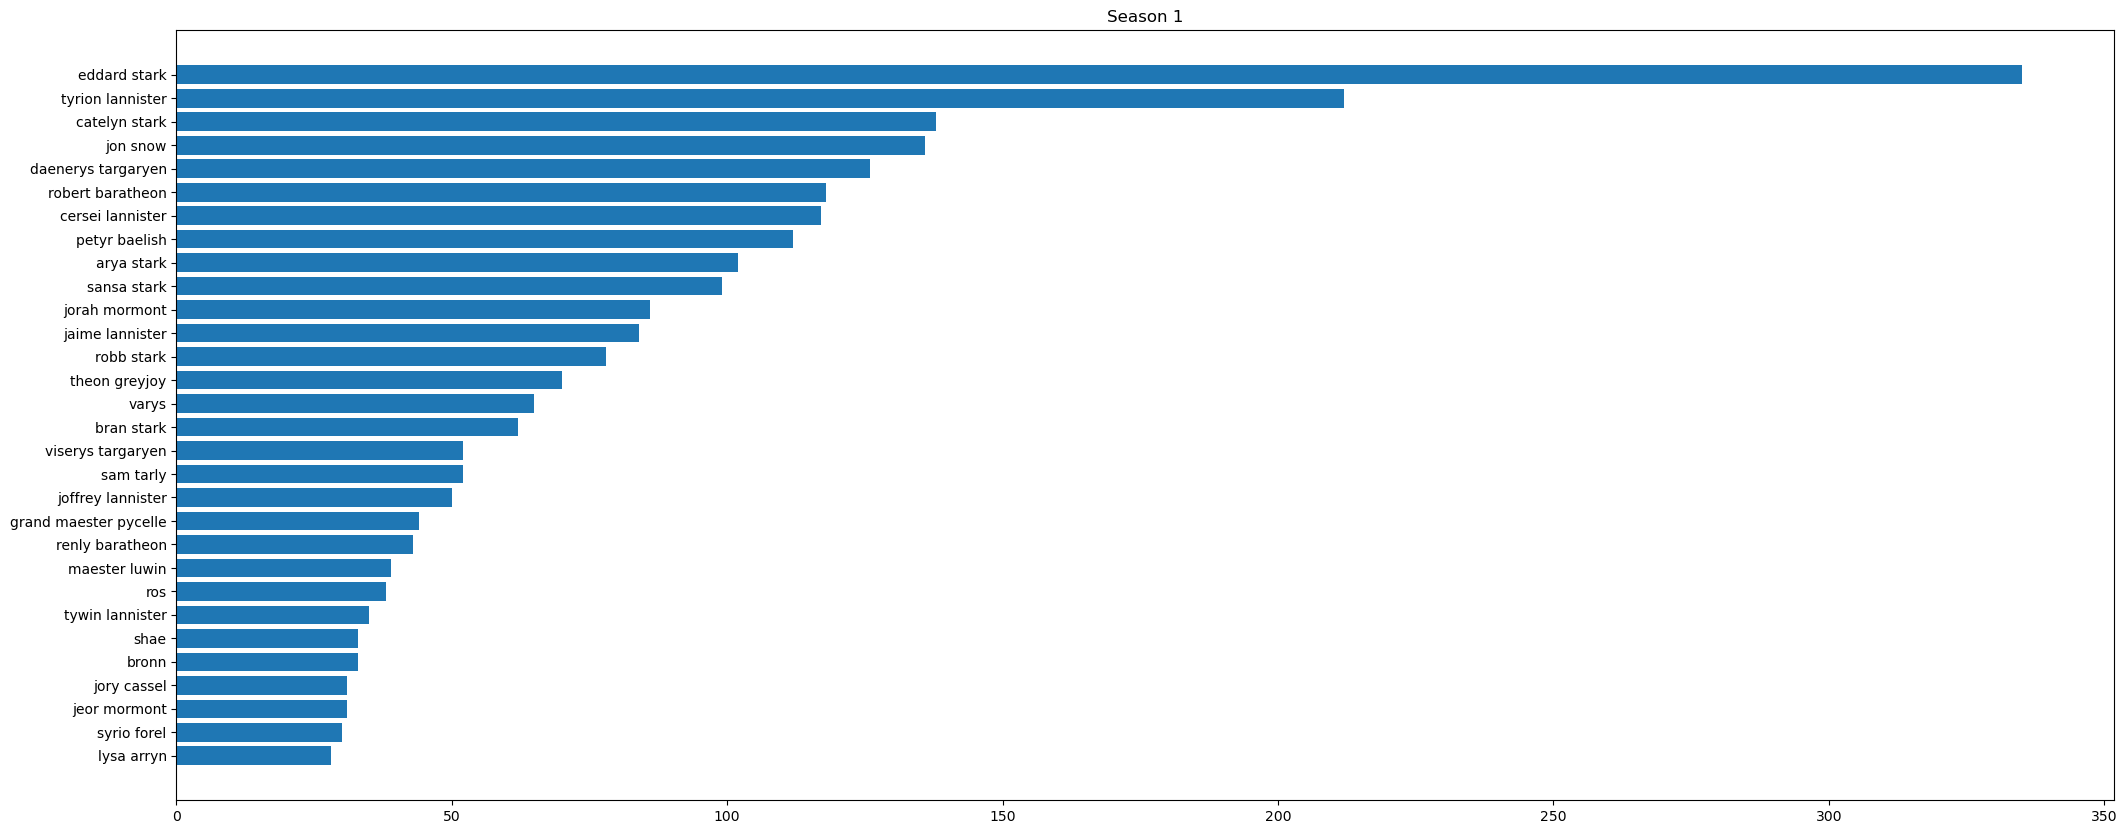

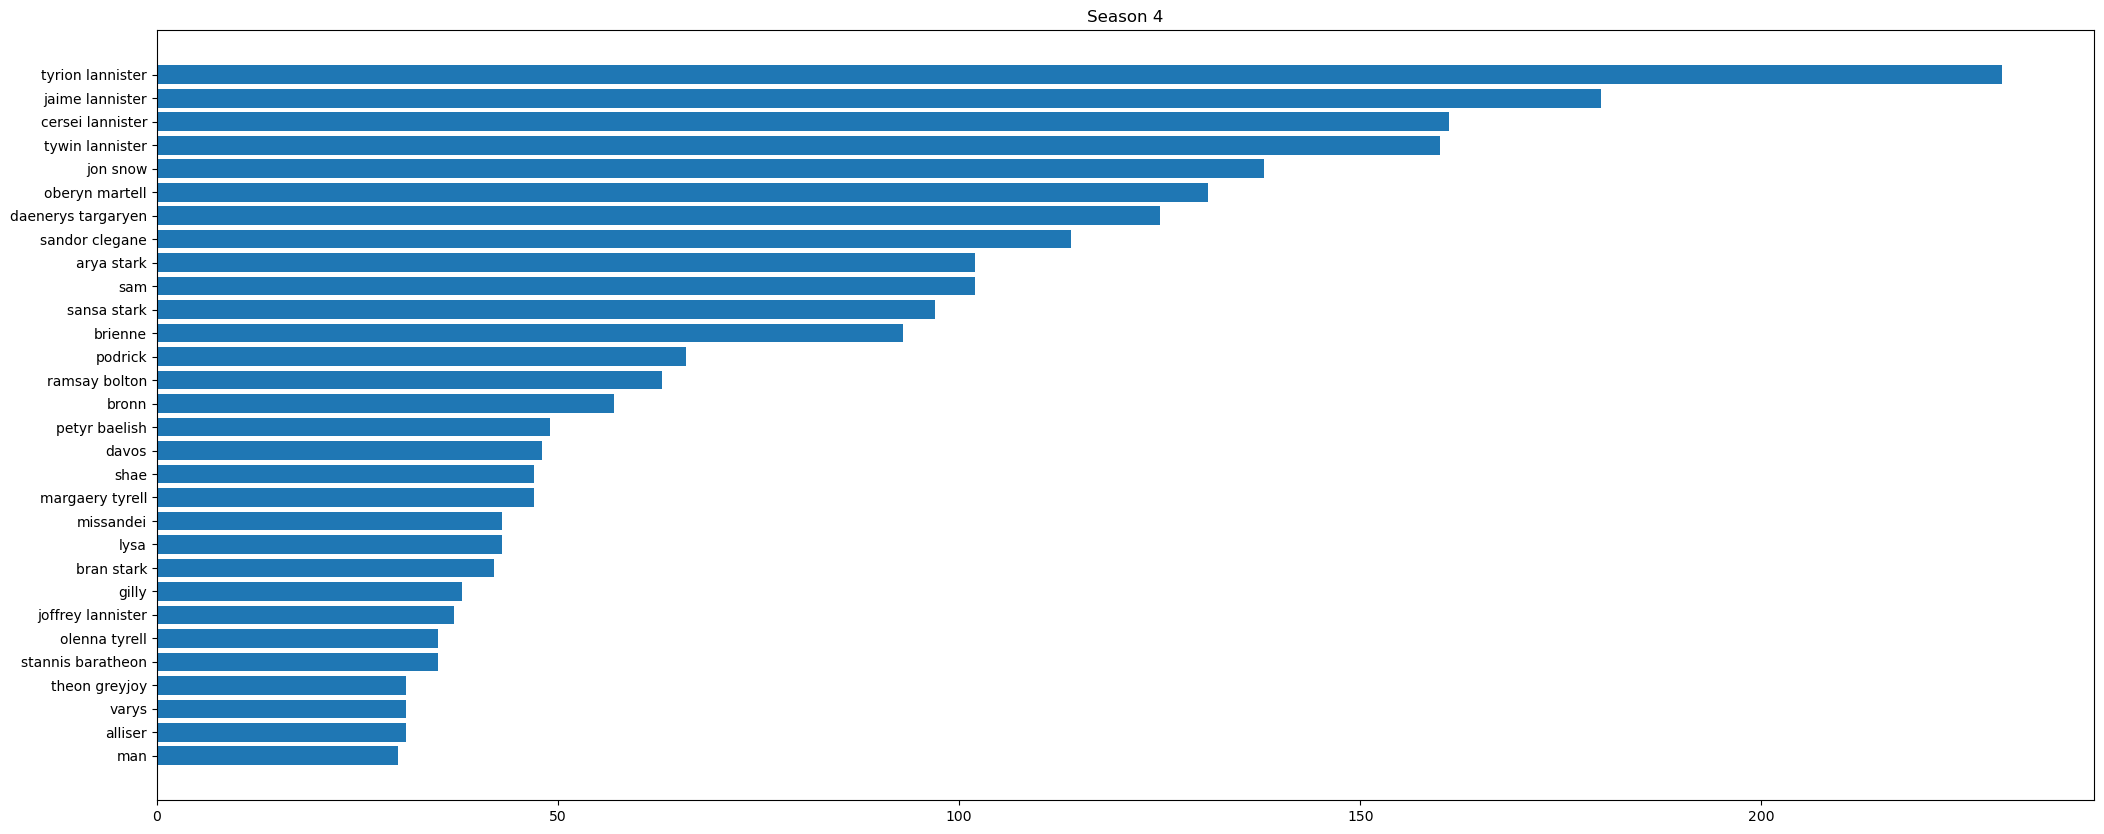

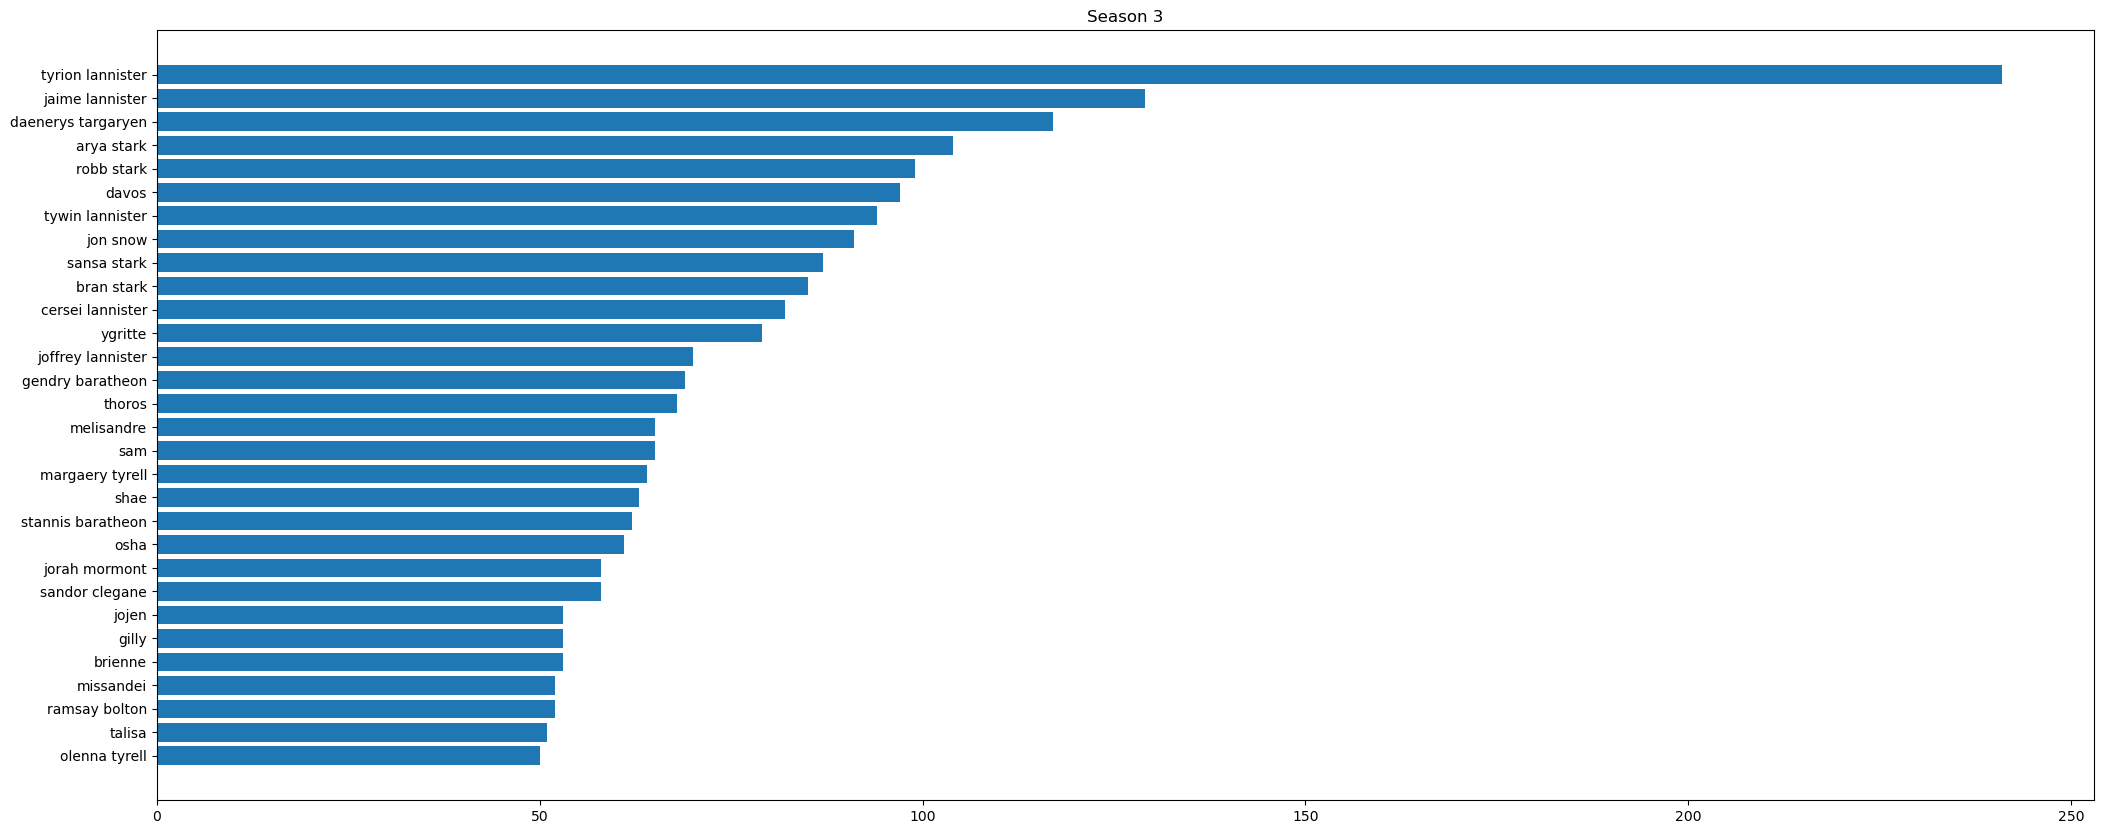

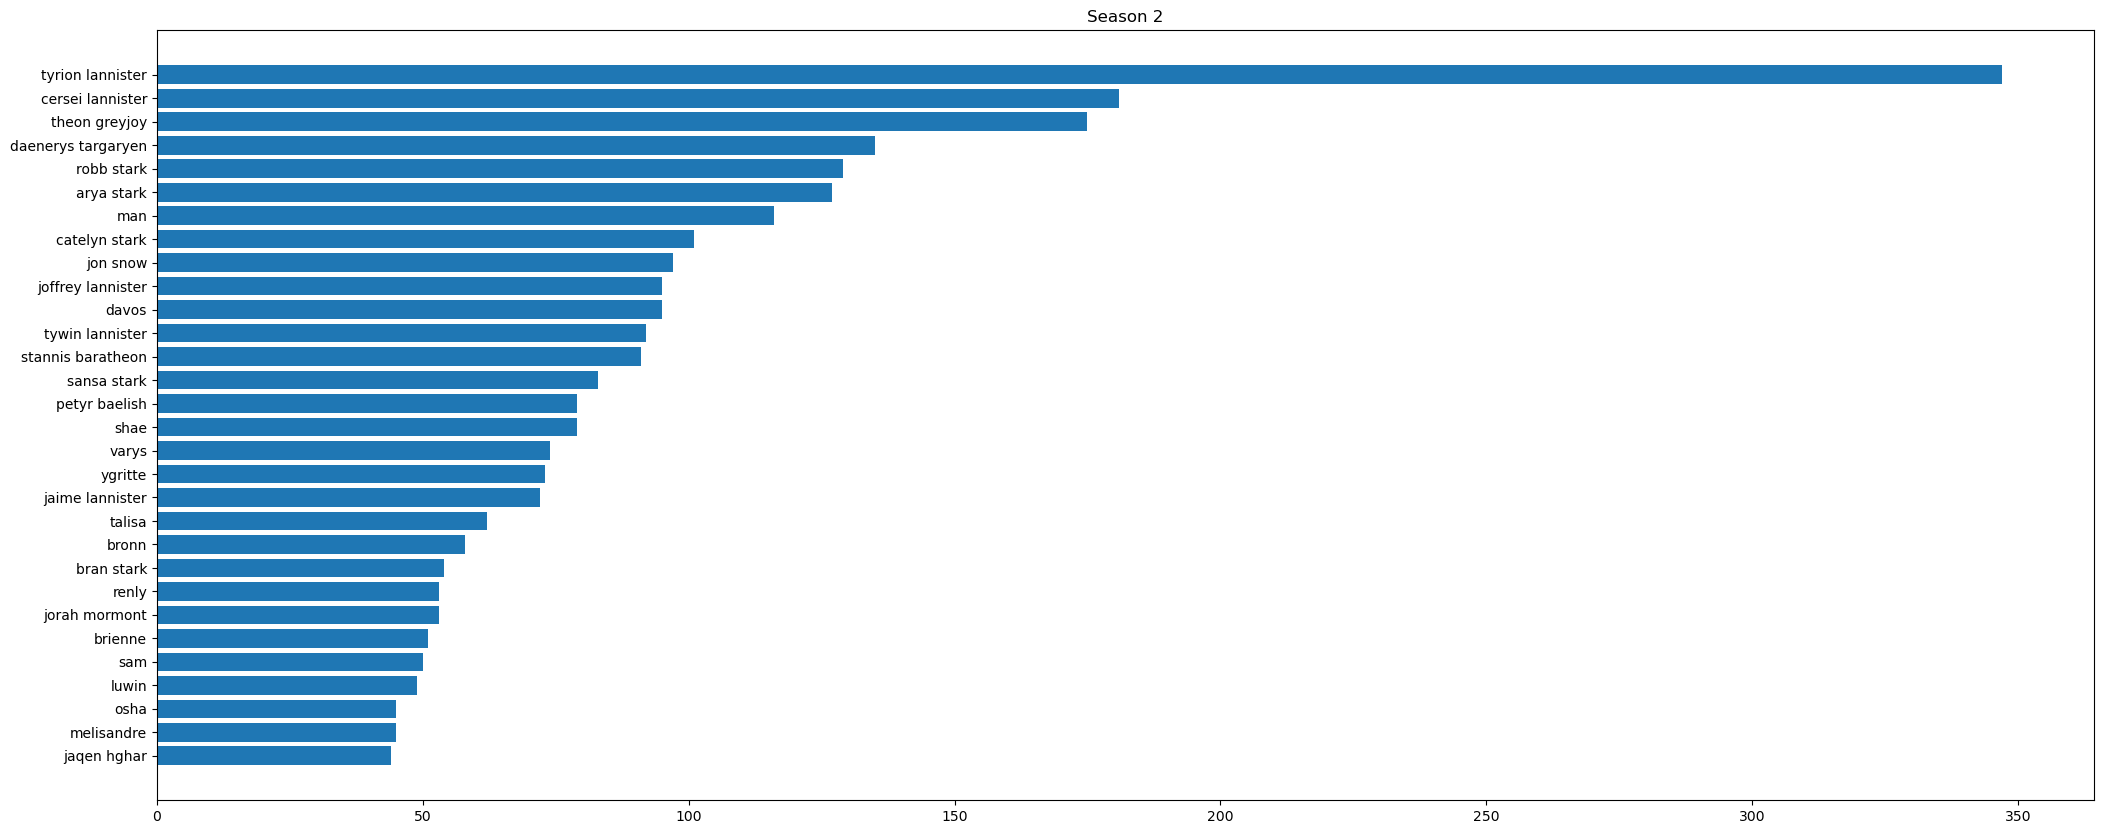

In [63]:
importance_of_character_per_Season(GOT)

**We observe that in the 8 seasons, the order of importance given to characters varies. This suggests that in certain seasons, a character is highlighted more than others. For example, in the first season, for those who watched the series, we noticed that Eddard Stark was the prominent character, and we observe that he is no longer present anywhere. This may lead us to believe that he died during that season because a character of such significance during a season cannot disappear so suddenly from one season to another.**

**If we take a closer look, we see that Jon Snow has a certain importance from the beginning of the series, and it continues to grow. Therefore, we can assume that he is one of the most important protagonists in the series, along with Tyrion, Jaime, Sansa, Arya,daenerys and Cersei.**

**These analyses highlight the Lannister, Stark, and Targaryen families throughout the entire series.**

## Analysis of the most frequently used words by the top 3 characters with the highest number of lines in each season.

In [156]:
def Most_Frequent_Word(df):
    Season_lines = {}
    Season2Character = {}
    
    for season in Seasons.index:
        Season = df[df['Season']==season]
        occurrences = Season.Name.value_counts()
        occurrences = occurrences.sort_values(ascending=False)
        Season_lines[season] = occurrences.head(3).index.tolist()
    
    for season,characters in Season_lines.items():
        Character2lines = {}
        
        
        for character in characters:
            sentences = []
            temp = df[(df['Name']== character) & (df['Season']==season)]
            temp.Sentence.apply(lambda x:sentences.append(x))
            Character2lines[character] = sentences
        
        
        Season2Character[season] = Character2lines
        
        
        
    return Season2Character
        
            
        

In [81]:
test = Most_Frequent_Word(GOT)
test

{'Season 8': ['tyrion lannister', 'jon snow', 'daenerys targaryen'],
 'Season 7': ['jon snow', 'daenerys targaryen', 'tyrion lannister'],
 'Season 6': ['tyrion lannister', 'jaime lannister', 'jon snow'],
 'Season 5': ['cersei lannister', 'tyrion lannister', 'jon snow'],
 'Season 1': ['eddard stark', 'tyrion lannister', 'catelyn stark'],
 'Season 4': ['tyrion lannister', 'jaime lannister', 'cersei lannister'],
 'Season 3': ['tyrion lannister', 'jaime lannister', 'daenerys targaryen'],
 'Season 2': ['tyrion lannister', 'cersei lannister', 'theon greyjoy']}

In [158]:
%%time
Season2Character = Most_Frequent_Word(GOT)

CPU times: total: 188 ms
Wall time: 197 ms


## Word cloud of character's lines

In [169]:
wc = WordCloud(background_color='white',max_font_size=100,max_words=150)